<a href="https://colab.research.google.com/github/Muhideenthegreat/FDSFE_MMustapha/blob/main/HW4/citibikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Federica B. Bianco @fedhere
# for UDel FDSfE 2022


Citibikes is the shared bike services for NYC and they historically have done a great job at making their data public (while respecting people's privacy of course! well... almost always... https://www.wsj.com/articles/SB10001424127887323829104578624263439561672)

-  The "idea" is that citi bikes, which are farily bulky bikes, may be designed in such a way that they are more comfortable for larger people, and therefore, on average, for men.  

-  If the bikes are uncomfortable, the users will not use them for long trips. So to test that you can measure the trip duration for customers that are registered as male and customers that are registered as female and see (1) if they  have the same mean, and (2) if they are "the same" distribution (more precisely you will meausre if they come from the "same parent distribution").

-  Choose the significance threshold

-  Wrangle the data so that it is ready for your analysis.

-  Explore the data statistical properties (mean, standard deviation...)

-  Clearly state they Null and Alternate hypothesis for the first question

-  Answer the first question with a t-test

-  Clearly state they Null and Alternate hypothesis for the second question

-  Answer the second question with a ks_2sample test


-  Extra Credit: split the sample in week-days and weekends and redo the analysis for the week-days and weekend cases separately

In [245]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# IDEA:
 Citibike usage would be different by gender if the bikes are more comfrotable for people who are taller and with larger frames.

Remember:
### NULL HYPOTHESIS _H0_: Customers identified as women take longer or equivalently long rides as customers identified as males
You want to falsify it so make it the opposite of your idea


### ALTERNATIVE HYPOTHESIS _HA_: Customeres identified as women take shorter rides than customers identified as males.
This shoudl be the complement of the NULL, including everything that the NULL does not




In [246]:
pvalue = 0.05

# Data gathering
Get a single month of data:  reading data from citibike csv file from May 2019



read a csv file with pandas so that the content is stored in a "DataFrame".

In [247]:
datestring = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip")
cbMay19

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0


# Data Exploration

you know what to do!

In [248]:
cbMay19.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [249]:
cbMay19.shape

(1924563, 15)

In [250]:
cbMay19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924563 entries, 0 to 1924562
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 220.2+ MB


In [251]:
cbMay19.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06
mean,1.067189e+03,1.671397e+03,4.073698e+01,-7.398223e+01,1.664596e+03,4.073675e+01,-7.398248e+01,2.712861e+04,1.979833e+03,1.152992e+00
std,1.254636e+04,1.473509e+03,3.062224e-02,1.970116e-02,1.473196e+03,3.048823e-02,1.976340e-02,6.404188e+03,1.199213e+01,5.516776e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.406860e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.790000e+02,3.820000e+02,4.071740e+01,-7.399595e+01,3.800000e+02,4.071723e+01,-7.399601e+01,2.082600e+04,1.969000e+03,1.000000e+00
50%,6.530000e+02,5.160000e+02,4.073726e+01,-7.398518e+01,5.150000e+02,4.073705e+01,-7.398584e+01,2.878200e+04,1.982000e+03,1.000000e+00
75%,1.158000e+03,3.293000e+03,4.075757e+01,-7.397121e+01,3.292000e+03,4.075715e+01,-7.397152e+01,3.257600e+04,1.990000e+03,1.000000e+00
max,2.922656e+06,3.790000e+03,4.081439e+01,-7.390774e+01,3.790000e+03,4.081439e+01,-7.390774e+01,3.800200e+04,2.003000e+03,2.000000e+00


In [252]:
cbMay19.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1


In [253]:
cbMay19.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0
1924562,964,2019-05-31 23:59:55.5500,2019-06-01 00:15:59.8680,285,Broadway & E 14 St,40.734546,-73.990741,3656,E 2 St & Avenue A,40.723077,-73.985836,32565,Subscriber,1992,2


You hsould have noticed the column gender: its encoded as a binary - 1 is for customers that identified as male, 2 for customers that identified as female. 0 is for non-binary and not registered genders

Because your variable of interest is "tripduration" explore this variable in some more detail.

In [254]:
detail = cbMay19["tripduration"]
detail

0           139
1           754
2          2308
3           143
4           138
           ... 
1924558     304
1924559     324
1924560    1926
1924561    2047
1924562     964
Name: tripduration, Length: 1924563, dtype: int64

In [255]:
detail.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1924563 entries, 0 to 1924562
Series name: tripduration
Non-Null Count    Dtype
--------------    -----
1924563 non-null  int64
dtypes: int64(1)
memory usage: 14.7 MB


In [256]:
detail.describe()

count    1.924563e+06
mean     1.067189e+03
std      1.254636e+04
min      6.100000e+01
25%      3.790000e+02
50%      6.530000e+02
75%      1.158000e+03
max      2.922656e+06
Name: tripduration, dtype: float64

## Plot the trip duration distribution

hint: when I say plot the distribution generally that means make a histogram


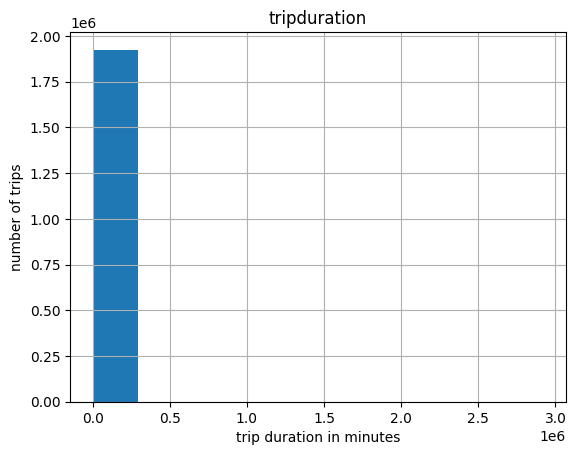

In [257]:
# your code here
cbMay19.hist(column = "tripduration")
plt.xlabel("trip duration in minutes")
plt.ylabel("number of trips");

Figure 1:. *A graphical representation (histogram) depicting the trip duration in minutes per number of trips in the distribution. The data reveals a pronounced right-skewed distribution, signifying that the majority of people in the distribution spent less time during their trips, while a minority of people accumulate as many as 3,000,000 likes.*

there are some really large numbers... trips that last >1000000 minutes...  clearly this is a data curation issue.

You need to clean the data by removin all data for which tripduration > 1 day (remember the duration is in minutes) and remake the plot


You can do it by setting the condition

```cbMay19["tripduration"] < ...```

and using this condition as an index

```cbMay19_clean = cbMay19[cbMay19["tripduration"]....```

Remake the histogram, now the sahape of the tripduration distribution should be much clearer

In [258]:
# your code here
cbMay19_clean = cbMay19[cbMay19["tripduration"]<=1440]
cbMay19_clean

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
6,514,2019-05-01 00:01:06.0520,2019-05-01 00:09:40.1670,439,E 4 St & 2 Ave,40.726281,-73.989780,336,Sullivan St & Washington Sq,40.730477,-73.999061,15160,Subscriber,1988,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924555,432,2019-05-31 23:59:41.6790,2019-06-01 00:06:54.2000,382,University Pl & E 14 St,40.734927,-73.992005,507,E 25 St & 2 Ave,40.739126,-73.979738,21562,Subscriber,1995,1
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2


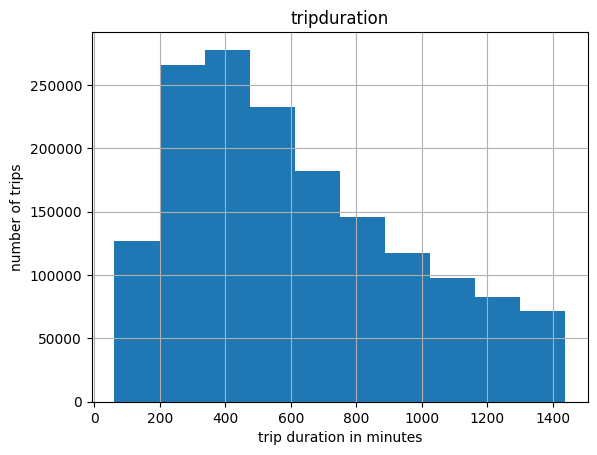

In [259]:
cbMay19_clean = cbMay19[cbMay19["tripduration"] < 1440]
cbMay19_clean.hist(column = "tripduration");
plt.xlabel("trip duration in minutes");
plt.ylabel("number of trips");

Figure 2: In this revised histogram, the shape of the trip duration distribution becomes much more evident, offering a clearer perspective on the sample.

# Data Wrangling

Split the data into two dataframes by gender
save the data corresponding to "gender" == 1 and the data corresponding to "gender" == 2 into two separate dataframes. Again you can do it by setting a condition on the column ```["gender"]```

In [260]:
malegroup =cbMay19_clean[cbMay19_clean["gender"]==1]
malegroup

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
6,514,2019-05-01 00:01:06.0520,2019-05-01 00:09:40.1670,439,E 4 St & 2 Ave,40.726281,-73.989780,336,Sullivan St & Washington Sq,40.730477,-73.999061,15160,Subscriber,1988,1
7,524,2019-05-01 00:01:21.0070,2019-05-01 00:10:05.9440,380,W 4 St & 7 Ave S,40.734011,-74.002939,439,E 4 St & 2 Ave,40.726281,-73.989780,16742,Subscriber,1964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924548,187,2019-05-31 23:59:21.1690,2019-06-01 00:02:28.7060,3496,1 Ave & E 110 St,40.792327,-73.938300,3502,Lexington Ave & E 111 St,40.795412,-73.944123,26794,Subscriber,1992,1
1924549,345,2019-05-31 23:59:22.6070,2019-06-01 00:05:08.5390,3298,Warren St & Court St,40.686371,-73.993833,3377,Carroll St & Bond St,40.678612,-73.990373,33433,Subscriber,1993,1
1924551,233,2019-05-31 23:59:28.4400,2019-06-01 00:03:21.5050,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34972,Subscriber,1974,1
1924553,824,2019-05-31 23:59:29.8370,2019-06-01 00:13:13.8450,3117,Franklin St & Dupont St,40.735640,-73.958660,3093,N 6 St & Bedford Ave,40.717452,-73.958509,15228,Subscriber,1987,1


In [261]:
femalegroup =cbMay19_clean[cbMay19_clean["gender"]==2]
femalegroup

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
10,236,2019-05-01 00:01:36.4020,2019-05-01 00:05:33.1980,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34411,Subscriber,1957,2
12,536,2019-05-01 00:01:44.6580,2019-05-01 00:10:41.3390,243,Fulton St & Rockwell Pl,40.688410,-73.979458,397,Fulton St & Clermont Ave,40.684157,-73.969223,30962,Subscriber,1974,2
20,290,2019-05-01 00:02:27.8000,2019-05-01 00:07:18.1110,346,Bank St & Hudson St,40.736529,-74.006180,168,W 18 St & 6 Ave,40.739713,-73.994564,30209,Subscriber,1984,2
22,553,2019-05-01 00:02:37.0480,2019-05-01 00:11:50.9870,448,W 37 St & 10 Ave,40.756604,-73.997901,485,W 37 St & 5 Ave,40.750380,-73.983390,21028,Subscriber,1989,2
30,355,2019-05-01 00:03:23.7070,2019-05-01 00:09:18.8550,325,E 19 St & 3 Ave,40.736245,-73.984738,438,St Marks Pl & 1 Ave,40.727791,-73.985649,25468,Subscriber,1990,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924554,699,2019-05-31 23:59:40.5130,2019-06-01 00:11:20.1020,368,Carmine St & 6 Ave,40.730386,-74.002150,470,W 20 St & 8 Ave,40.743453,-74.000040,16373,Subscriber,1976,2
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2


In [262]:
nonbinary =cbMay19_clean[cbMay19_clean["gender"]== 0]
nonbinary

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
28,570,2019-05-01 00:03:10.7060,2019-05-01 00:12:41.6440,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25865,Customer,1969,0
72,1122,2019-05-01 00:08:33.0230,2019-05-01 00:27:15.2680,310,State St & Smith St,40.689269,-73.989129,3322,12 St & 4 Ave,40.668603,-73.990439,17229,Customer,1969,0
81,489,2019-05-01 00:09:43.6590,2019-05-01 00:17:52.9710,492,W 33 St & 7 Ave,40.750200,-73.990931,482,W 15 St & 7 Ave,40.739355,-73.999318,19345,Customer,1969,0
85,452,2019-05-01 00:10:07.5370,2019-05-01 00:17:39.5680,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,365,Fulton St & Grand Ave,40.682232,-73.961458,34132,Subscriber,1985,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924473,812,2019-05-31 23:56:45.4980,2019-06-01 00:10:17.7870,477,W 41 St & 8 Ave,40.756405,-73.990026,334,W 20 St & 7 Ave,40.742388,-73.997262,34106,Customer,1969,0
1924476,1334,2019-05-31 23:56:48.5810,2019-06-01 00:19:03.4390,3108,Nassau Ave & Russell St,40.725570,-73.944340,3763,Wyckoff Av & Jefferson St,40.707165,-73.923711,18411,Customer,1969,0
1924478,1213,2019-05-31 23:56:51.0030,2019-06-01 00:17:04.3990,362,Broadway & W 37 St,40.751726,-73.987535,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,18984,Customer,1969,0
1924529,265,2019-05-31 23:58:54.6710,2019-06-01 00:03:20.2840,399,Lafayette Ave & St James Pl,40.688515,-73.964763,313,Washington Ave & Park Ave,40.696102,-73.967510,33805,Subscriber,1991,0


## plot the trip duration distributions for gender=2 and gender=1



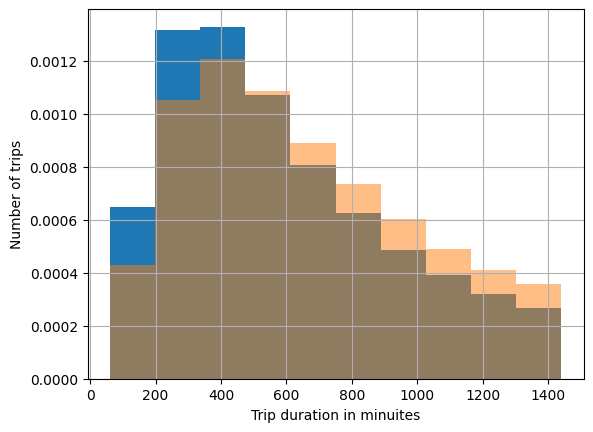

In [263]:
# your code here
plt.hist(malegroup["tripduration"], density = 1)
plt.hist(femalegroup["tripduration"], density = 1, alpha = 0.5)
plt.xlabel("Trip duration in minuites")
plt.ylabel("Number of trips")
plt.grid()

Figure 3: This overlaid histogram shows the similarity between the trend for male and feamle trip duration in this distribution. Both histograms are skewed to the right and we can see that most of the trips completed by both genders was between 100-600 minutes. The blue histogram shows the distribution for the makes while the orange shows that of the females. The male group also tend to have the highets number of trip as shown in the histogram.

Notice how the histograms are differnt hights: one of the two categories has a lot more trips than the other one. Figure out which and discuss it in the caption

# Statistical analysis
Run two statistical tests: the t-test and the KS-test.


# Check if the mean of the samples is the same

Your Null hypothesis _H0_ and Alternative hypotehsis _HA_ are respectively:

H0: µ1 = µ2 (the two sample means are equal)

HA: µ1 ≠µ2 (the two sample means are not equal)

First look at the data summary statistics: are the means the same number? are the means contained within each other's standard deviations --- i.e. is

_mean1 > mean2 - std2 and mean1 < mean2 + std2_

or

_mean2 > mean1 - std1 and mean2 < mean1 + std1_

this will set some expextation.





In [264]:
male_mean = malegroup["tripduration"].mean()
male_mean

588.2070911461445

In [265]:
male_std = malegroup["tripduration"].std()
male_std

335.0298440931862

In [266]:
female_mean = femalegroup["tripduration"].mean()
female_mean

652.1760137019039

In [267]:
female_std = femalegroup["tripduration"].std()
female_std

342.0291207094665

In [268]:
equal = male_mean == female_mean
equal

False

In [269]:
(female_mean - female_std) <= male_mean <= (female_mean + female_std)

True

In [270]:
(male_mean - male_std) <= female_mean <= (male_mean + male_std)

True

The mean for the two samples are not the same, but they are contained within each other's standard deviation



To answer the question more formally  test you can use the t-test. You can use the ```ttest_ind`` function in python ```scipy.stats.ttest_ind()``` passing the first sample for a and the other for b (ind stands for independent, i.e. the assumption is that the sample are independent samples)

In [271]:
# get the usage information for the function here or on the webpage of the function
stats.ttest_ind

<function scipy.stats._stats_py.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, *, keepdims=False)>

In [272]:
# your code here
stats.ttest_ind(malegroup.tripduration, femalegroup.tripduration)

TtestResult(statistic=-100.84403665697792, pvalue=0.0, df=1497930.0)

interpret the result based on your chosen confidence threshold and on the results of the ```ttest_ind`` function.



Since I chose an interval of 95% and the p value is less than 0.05. This indicates good evidence to reject the null hypothesis that customers identified as women take longer or equivalently long rides as customers identified as males, because they are not. The difference shown above is significant to determine this.


# Are the sample coming from the same parent distribution

The next test answers the questions: do the samples come from the same generative process (or "parent function"). Often we write the hypothesis for this test more simple as "are the distributions the same"





Write the NULL and Alternative hypothesis here

H0: Customers identified as women take longer or equivalently long rides as customers identified as males

HA: Customeres identified as women take shorter rides than customers identified as males.

Run the test ```stats.ks_2samp```

In [273]:
# your code here
stats.ks_2samp(malegroup.tripduration, femalegroup.tripduration)

KstestResult(statistic=0.08422140452629323, pvalue=0.0, statistic_location=525, statistic_sign=1)

Since the pvalue(0) is less than the significance threshold, it can be concluded that the two samples do not come from the same parent distribution.

In fact this test is very sensitive to differences in the mean of the sample. To use the test properly one should first normalize the data. That is: subtract the mean and divide by the standard deviation. This is how you would do it (my two clean samples for gender = 1 and gender = 2 are called cbMay19_m and cbMay19_f, yours will be possibly called differently)

In [274]:
normed_f = (femalegroup["tripduration"] - femalegroup["tripduration"].mean()) / femalegroup["tripduration"].std()
normed_m = (malegroup["tripduration"] - malegroup["tripduration"].mean()) / malegroup["tripduration"].std()

rerun the test after normalizing, did the conclusion change?

In [275]:
# your code here
stats.ks_2samp(normed_m, normed_f)

KstestResult(statistic=0.022785464212612745, pvalue=1.4148236782790818e-127, statistic_location=-1.275259874940326, statistic_sign=-1)

The conclusion now changes after re-running the k test with a normalized data, the p value(1.41e-127) which is a very small and insignificant value. This means that we reject the null hypothesis, telling us that our datasets are from the same parent distribution.

# Extra Credit : do the same for week days only and weekends only

Pandas uses an excellent package to process dates! the datetime package

The current date columns are starttime and stoptime. You can convert starttime, which is currently a column containing simple strings, to a python datetime variable as follows



In [276]:
cbMay19_clean["starttime"]

0          2019-05-01 00:00:01.9010
1          2019-05-01 00:00:03.0210
3          2019-05-01 00:00:19.3340
4          2019-05-01 00:00:22.1840
6          2019-05-01 00:01:06.0520
                     ...           
1924555    2019-05-31 23:59:41.6790
1924556    2019-05-31 23:59:42.1250
1924558    2019-05-31 23:59:45.5760
1924559    2019-05-31 23:59:46.4650
1924562    2019-05-31 23:59:55.5500
Name: starttime, Length: 1601848, dtype: object

In [277]:
cbMay19_clean["tripdate"] = pd.to_datetime(cbMay19_clean.starttime)
cbMay19_clean["tripdate"]

<ipython-input-277-073e4a941727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbMay19_clean["tripdate"] = pd.to_datetime(cbMay19_clean.starttime)


0         2019-05-01 00:00:01.901
1         2019-05-01 00:00:03.021
3         2019-05-01 00:00:19.334
4         2019-05-01 00:00:22.184
6         2019-05-01 00:01:06.052
                    ...          
1924555   2019-05-31 23:59:41.679
1924556   2019-05-31 23:59:42.125
1924558   2019-05-31 23:59:45.576
1924559   2019-05-31 23:59:46.465
1924562   2019-05-31 23:59:55.550
Name: tripdate, Length: 1601848, dtype: datetime64[ns]

Once you have a datetime column for the start of the trip you can separate week days and weekends using the condition

```cbMay19["tripdate"].dt.weekday < 5```

for weekdays and

```cbMay19["tripdate"].dt.weekday >= 5```

for weekends.

With the dataset separate in weekend and weekdays you can ask the same kind of questions: is trip duration characteristically different on weekends than on week days, or, are the gender-based differences you found for the overall sample the same for weekdays and weekends?


In [278]:
weekdays = cbMay19_clean[cbMay19_clean["tripdate"].dt.weekday < 5]
weekdays

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1,2019-05-01 00:00:01.901
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0,2019-05-01 00:00:03.021
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1,2019-05-01 00:00:19.334
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1,2019-05-01 00:00:22.184
6,514,2019-05-01 00:01:06.0520,2019-05-01 00:09:40.1670,439,E 4 St & 2 Ave,40.726281,-73.989780,336,Sullivan St & Washington Sq,40.730477,-73.999061,15160,Subscriber,1988,1,2019-05-01 00:01:06.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924555,432,2019-05-31 23:59:41.6790,2019-06-01 00:06:54.2000,382,University Pl & E 14 St,40.734927,-73.992005,507,E 25 St & 2 Ave,40.739126,-73.979738,21562,Subscriber,1995,1,2019-05-31 23:59:41.679
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2,2019-05-31 23:59:42.125
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2,2019-05-31 23:59:45.576
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2,2019-05-31 23:59:46.465


In [279]:
weekend=cbMay19_clean[cbMay19_clean["tripdate"].dt.weekday >= 5]
weekend

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
192003,426,2019-05-04 00:00:07.3100,2019-05-04 00:07:13.9450,3118,McGuinness Blvd & Eagle St,40.735550,-73.952840,3668,Leonard St & Nassau Ave,40.723957,-73.949844,17924,Subscriber,1980,1,2019-05-04 00:00:07.310
192004,778,2019-05-04 00:00:10.8690,2019-05-04 00:13:09.1860,3656,E 2 St & Avenue A,40.723077,-73.985836,2012,E 27 St & 1 Ave,40.739445,-73.976806,31269,Subscriber,1996,2,2019-05-04 00:00:10.869
192005,451,2019-05-04 00:00:15.6220,2019-05-04 00:07:47.0350,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,3083,Bushwick Ave & Powers St,40.712477,-73.941000,29921,Subscriber,1993,2,2019-05-04 00:00:15.622
192006,196,2019-05-04 00:00:20.7160,2019-05-04 00:03:37.0950,328,Watts St & Greenwich St,40.724055,-74.009660,257,Lispenard St & Broadway,40.719392,-74.002472,24996,Subscriber,1968,1,2019-05-04 00:00:20.716
192007,370,2019-05-04 00:00:21.0860,2019-05-04 00:06:31.8570,2003,1 Ave & E 18 St,40.733812,-73.980544,445,E 10 St & Avenue A,40.727408,-73.981420,30508,Subscriber,1994,1,2019-05-04 00:00:21.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607614,596,2019-05-26 23:59:44.4710,2019-05-27 00:09:41.3350,529,W 42 St & 8 Ave,40.757570,-73.990985,456,E 53 St & Madison Ave,40.759711,-73.974023,31658,Subscriber,1981,1,2019-05-26 23:59:44.471
1607615,115,2019-05-26 23:59:47.0730,2019-05-27 00:01:42.6020,3062,Myrtle Ave & Marcy Ave,40.695398,-73.949549,3062,Myrtle Ave & Marcy Ave,40.695398,-73.949549,24936,Customer,1969,0,2019-05-26 23:59:47.073
1607616,577,2019-05-26 23:59:48.0450,2019-05-27 00:09:25.2180,3078,Broadway & Roebling St,40.709248,-73.960631,3092,Berry St & N 8 St,40.719009,-73.958525,16657,Customer,1969,0,2019-05-26 23:59:48.045
1607617,628,2019-05-26 23:59:52.3010,2019-05-27 00:10:20.9620,3142,1 Ave & E 62 St,40.761227,-73.960940,499,Broadway & W 60 St,40.769155,-73.981918,14790,Subscriber,1988,1,2019-05-26 23:59:52.301


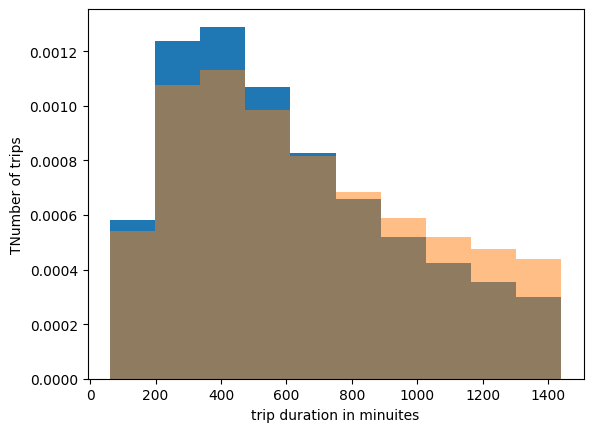

In [280]:
plt.hist(weekdays["tripduration"], density=1)
plt.hist(weekend["tripduration"],density=1,alpha=0.5)
plt.xlabel("trip duration in minuites")
plt.ylabel("TNumber of trips");

In [281]:
weekday_mean= weekdays["tripduration"].mean()
weekday_mean

608.8891058890139

In [282]:
weekday_std= weekdays["tripduration"].std()
weekday_std

339.58528062792215

In [283]:
weekend_mean=weekend["tripduration"].mean()
weekend_mean

659.7204287850443

In [284]:
weekend_std= weekend["tripduration"].std()
weekend_std

361.2227850230116

In [285]:
equal = weekday_mean == weekend_mean
equal

False

In [286]:
(weekend_mean - weekend_std) <= weekday_mean <= (weekend_mean + weekend_std)

True

In [287]:
(weekday_mean - weekday_std) <= weekend_mean <= (weekday_mean + weekday_std)

True

In [288]:
stats.ttest_ind(weekdays.tripduration, weekend.tripduration)

TtestResult(statistic=-73.81895892918912, pvalue=0.0, df=1601846.0)

Since I chose an interval of 95% and the p value is less than 0.05. This indicates good evidence to reject this null hypothesis.